In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic

In [2]:
pd.Series(['Hello', 'World', 'Greeting', '你好', 2019])

0       Hello
1       World
2    Greeting
3          你好
4        2019
dtype: object

## DataFrame Sample 1

In [3]:
weekdays = pd.date_range(datetime.date.today(), periods = 7)
weekdays

DatetimeIndex(['2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# dir(np.random)

w1 = pd.DataFrame(np.random.randint(1, 100, size=(7,3)), index=weekdays, columns=['张老板', '黄老板', '林老板'])
w1

,张老板,黄老板,林老板
2024-01-19,38,67,77
2024-01-20,59,1,4
2024-01-21,75,4,10
2024-01-22,90,94,8
2024-01-23,59,83,71
2024-01-24,31,51,2
2024-01-25,15,21,96


In [5]:
w1['2019-6-13':'2019-06-15']

,张老板,黄老板,林老板


In [6]:
w1.mean()

张老板    52.428571
黄老板    45.857143
林老板    38.285714
dtype: float64

In [7]:
w1.mean(1)

2024-01-19    60.666667
2024-01-20    21.333333
2024-01-21    29.666667
2024-01-22    64.000000
2024-01-23    71.000000
2024-01-24    28.000000
2024-01-25    44.000000
Freq: D, dtype: float64

In [8]:
w1.apply(lambda x: (x.max() + x.min())/2 )

张老板    52.5
黄老板    47.5
林老板    49.0
dtype: float64

In [9]:
pd.concat([w1[0:1],  w1[3:5]])

,张老板,黄老板,林老板
2024-01-19,38,67,77
2024-01-22,90,94,8
2024-01-23,59,83,71


## DataFrame Sample 2

In [10]:
mydf = pd.DataFrame(
    {
        'UID': ['44024583443', '44024543422', '44024598721'],
        '名称': ['波音飞机', '红双喜', 'HM汽车'],
        '销量': [181, 2214, 1235],
        '统计日期': [datetime.datetime.now(), datetime.datetime.now(), datetime.datetime.now()]
    }
)
mydf

,UID,名称,销量,统计日期
0,44024583443,波音飞机,181,2024-01-19 15:13:00.822559
1,44024543422,红双喜,2214,2024-01-19 15:13:00.822582
2,44024598721,HM汽车,1235,2024-01-19 15:13:00.822584


In [11]:
mydf['名称']

0    波音飞机
1     红双喜
2    HM汽车
Name: 名称, dtype: object

In [12]:
mydf.iloc[1]

UID                    44024543422
名称                             红双喜
销量                            2214
统计日期    2024-01-19 15:13:00.822582
Name: 1, dtype: object

In [13]:
mydf.iloc[1:3, [3,1,2]]

,统计日期,名称,销量
1,2024-01-19 15:13:00.822582,红双喜,2214
2,2024-01-19 15:13:00.822584,HM汽车,1235


In [14]:
mydf[mydf.销量<1000]

,UID,名称,销量,统计日期
0,44024583443,波音飞机,181,2024-01-19 15:13:00.822559


In [15]:
mydf.T

,0,1,2
UID,44024583443,44024543422,44024598721
名称,波音飞机,红双喜,HM汽车
销量,181,2214,1235
统计日期,2024-01-19 15:13:00.822559,2024-01-19 15:13:00.822582,2024-01-19 15:13:00.822584


In [16]:
mydf2 = mydf.copy()
mydf2['价格'] = [ 1299, 98.5, 308 ]
mydf2['库存情况'] = [ '充足', '紧张', '缺货' ]
mydf2

,UID,名称,销量,统计日期,价格,库存情况
0,44024583443,波音飞机,181,2024-01-19 15:13:00.822559,1299.0,充足
1,44024543422,红双喜,2214,2024-01-19 15:13:00.822582,98.5,紧张
2,44024598721,HM汽车,1235,2024-01-19 15:13:00.822584,308.0,缺货


In [17]:
mydf2[mydf2['库存情况'].isin(['紧张', '缺货'])]

,UID,名称,销量,统计日期,价格,库存情况
1,44024543422,红双喜,2214,2024-01-19 15:13:00.822582,98.5,紧张
2,44024598721,HM汽车,1235,2024-01-19 15:13:00.822584,308.0,缺货


In [18]:
mydf3 = pd.DataFrame(
    {
        'UID': ['44024543422', '44024583443', '44024598721'],
        '制造商': ['中华烟草', '波音公司', '广汽集团'],
    }
)
mydf3

,UID,制造商
0,44024543422,中华烟草
1,44024583443,波音公司
2,44024598721,广汽集团


In [19]:
# DataFrame Merge
pd.merge(mydf2, mydf3, on='UID')

,UID,名称,销量,统计日期,价格,库存情况,制造商
0,44024583443,波音飞机,181,2024-01-19 15:13:00.822559,1299.0,充足,波音公司
1,44024543422,红双喜,2214,2024-01-19 15:13:00.822582,98.5,紧张,中华烟草
2,44024598721,HM汽车,1235,2024-01-19 15:13:00.822584,308.0,缺货,广汽集团


In [20]:
mydf4 = pd.DataFrame(
    {
        'UID': ['44025583111'],
        '名称': ['AKM突击步枪'],
        '销量': [3200],
        '统计日期': [datetime.datetime.now()]
    }
)
mydf4

,UID,名称,销量,统计日期
0,44025583111,AKM突击步枪,3200,2024-01-19 15:13:02.033622


In [21]:
# DataFrame Append
mydf24 = mydf2.append(mydf4, ignore_index=True, sort=True)

uid = mydf24[mydf24.UID == '44025583111'].index.values[0]

mydf24.at[uid, '价格'] = 279.18
mydf24.at[uid, '库存情况'] = '充足'
mydf24

,UID,价格,名称,库存情况,统计日期,销量
0,44024583443,1299.00,波音飞机,充足,2024-01-19 15:13:00.822559,181
1,44024543422,98.50,红双喜,紧张,2024-01-19 15:13:00.822582,2214
2,44024598721,308.00,HM汽车,缺货,2024-01-19 15:13:00.822584,1235
3,44025583111,279.18,AKM突击步枪,充足,2024-01-19 15:13:02.033622,3200


In [22]:
mydf25 = mydf24.copy()
mydf25.at[0, '名称'] = '红双喜'
mydf25.at[1,'库存情况'] = '充足'
mydf25.at[2, '名称'] = 'AKM突击步枪'
mydf25

,UID,价格,名称,库存情况,统计日期,销量
0,44024583443,1299.00,红双喜,充足,2024-01-19 15:13:00.822559,181
1,44024543422,98.50,红双喜,充足,2024-01-19 15:13:00.822582,2214
2,44024598721,308.00,AKM突击步枪,缺货,2024-01-19 15:13:00.822584,1235
3,44025583111,279.18,AKM突击步枪,充足,2024-01-19 15:13:02.033622,3200


In [23]:
mydf25.groupby(['名称', '库存情况']).sum()

价格    销量
名称      库存情况               
AKM突击步枪 充足     279.18  3200
        缺货     308.00  1235
红双喜     充足    1397.50  2395

In [24]:
pd.pivot_table(mydf25, values='销量', index=['名称'], columns=['库存情况'])

库存情况,充足,缺货
名称,,
AKM突击步枪,3200.0,1235.0
红双喜,1197.5,NaN


## DataFrame Sample 3

In [25]:
sh1 = pd.DataFrame(
    {
        '学号': ['1082', '1083', '1084', '1085', '1086', '1087'],
        '姓名': ['小王', '小李', '小黄', '小张', '小孔', '小叶'],
        '评分': ['a', 'c', 'e', 'b', 'c', 'a']
    }
)
sh1

,学号,姓名,评分
0,1082,小王,a
1,1083,小李,c
2,1084,小黄,e
3,1085,小张,b
4,1086,小孔,c
5,1087,小叶,a


In [26]:
sh1['评级'] = sh1['评分'].astype('category')
sh1['评级']

0    a
1    c
2    e
3    b
4    c
5    a
Name: 评级, dtype: category
Categories (4, object): [a, b, c, e]

In [27]:
sh1['评级'].cat.categories = ['非常好','好','一般','非常差']
sh1['评级']

0    非常好
1     一般
2    非常差
3      好
4     一般
5    非常好
Name: 评级, dtype: category
Categories (4, object): [非常好, 好, 一般, 非常差]

In [28]:
sh1['评级'] = sh1['评级'].cat.set_categories(['非常好','好','一般','差','非常差'])
sh1.sort_values(by = ['评级', '姓名'])

,学号,姓名,评分,评级
5,1087,小叶,a,非常好
0,1082,小王,a,非常好
3,1085,小张,b,好
4,1086,小孔,c,一般
1,1083,小李,c,一般
2,1084,小黄,e,非常差


In [29]:
sh1.groupby('评级').size()

评级
非常好    2
好      1
一般     2
差      0
非常差    1
dtype: int64

## Diagram / Chart / Plot / Table

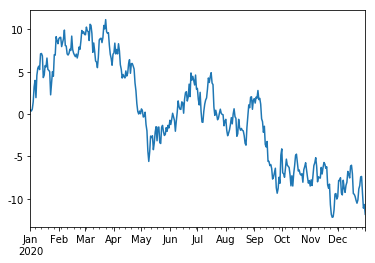

In [53]:
# the year of random datas.
year = 2020

d1 = datetime.date(year,1,1)
d2 = datetime.date(year+1,1,1)
dd = d2 - d1

ts = pd.Series(np.random.randn(
    dd.days), index=pd.date_range(d1, periods=dd.days))
ts = ts.cumsum()
ts.plot()

### Fix Chinese Display Issue

In [54]:
# Fix Chinese unrecognized issue
plt.rcParams['font.sans-serif']=['unifont']  # For Deepin linux 
## plt.rcParams['font.sans-serif']=['Microsoft Yahei']  # For windows 
plt.rcParams['axes.unicode_minus']=False # Fix Minus Sign unrecognized issue

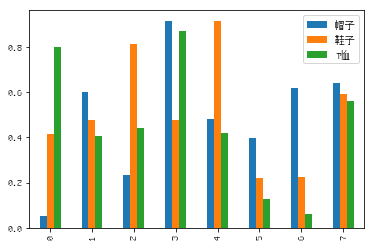

In [55]:
df2 = pd.DataFrame(np.random.rand(8, 3), columns=['帽子', '鞋子', 'T恤'])
df2.plot.bar()

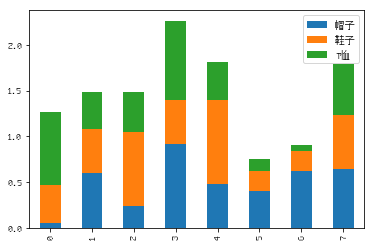

In [56]:
df2.plot.bar(stacked=True);

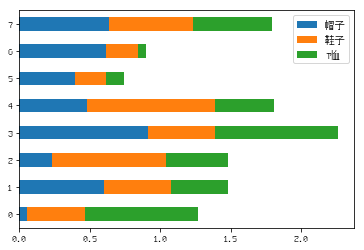

In [57]:
df2.plot.barh(stacked=True);

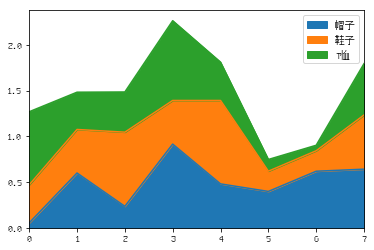

In [58]:
df2.plot.area();

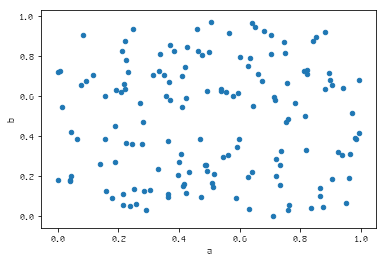

In [59]:
df = pd.DataFrame(np.random.rand(150, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

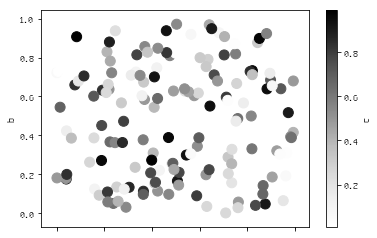

In [60]:
df.plot.scatter(x='a', y='b', c='c', s=100);

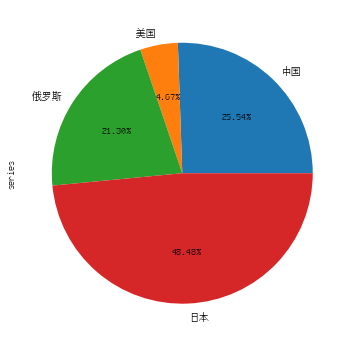

In [61]:
series = pd.Series(3 * np.random.rand(4),index=['中国', '美国', '俄罗斯', '日本'], name='series')
series.plot.pie(figsize=(6, 6), autopct='%.2f%%')

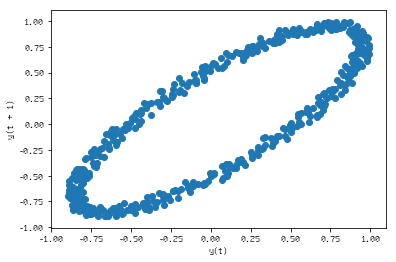

In [62]:
from pandas.plotting import lag_plot
plt.figure()
spacing = np.linspace(-50 * np.pi, 50 * np.pi, num=500)
data = pd.Series(0.1 * np.random.rand(500) + 0.9 * np.sin(spacing))
lag_plot(data)

## Read CSV FIle

In [63]:
csv = pd.read_csv("sample.csv")

#csv.sort_index(axis=0, ascending=False)
csv.sort_values('单价', ascending=False)

,型号,数量,单价
8,HM0729-2736,5,22.99
13,HM0722-136,1,21.99
12,HM0706-2741,2,20.99
11,HM0701-841,7,19.99
10,HM0701-839,1,18.99
0,HM0722-240,4,17.99
14,HM0722-137,1,17.99
9,HM0701-2542,1,17.99
3,HM0723-3236,2,17.99
5,HM0725-2739,3,16.99


In [64]:
csv.columns

Index(['型号', '数量', '单价'], dtype='object')

In [65]:
for v in csv['型号'].values[:-1]:
    print(v, end=', ')
print(csv['型号'].values[-1])

HM0722-240, HM0722-3436, HM0722-3437, HM0723-3236, HM0724-1040, HM0725-2739, HM0727-140, HM0727-241, HM0729-2736, HM0701-2542, HM0701-839, HM0701-841, HM0706-2741, HM0722-136, HM0722-137, HM0722-138, HM0722-139, HM0722-237


In [66]:
csv.to_numpy()

array([['HM0722-240', 4, 17.99],
       ['HM0722-3436', 1, 13.99],
       ['HM0722-3437', 1, 12.99],
       ['HM0723-3236', 2, 17.99],
       ['HM0724-1040', 1, 15.49],
       ['HM0725-2739', 3, 16.99],
       ['HM0727-140', 5, 13.99],
       ['HM0727-241', 1, 12.99],
       ['HM0729-2736', 5, 22.99],
       ['HM0701-2542', 1, 17.99],
       ['HM0701-839', 1, 18.99],
       ['HM0701-841', 7, 19.99],
       ['HM0706-2741', 2, 20.99],
       ['HM0722-136', 1, 21.99],
       ['HM0722-137', 1, 17.99],
       ['HM0722-138', 2, 15.49],
       ['HM0722-139', 6, 16.99],
       ['HM0722-237', 3, 13.99]], dtype=object)

In [67]:
csv.describe()
#csv.describe().mean()

,数量,单价
count,18.000000,18.000000
mean,2.611111,17.212222
std,1.974511,3.035197
min,1.000000,12.990000
25%,1.000000,14.365000
50%,2.000000,17.490000
75%,3.750000,18.740000
max,7.000000,22.990000


In [68]:
csv.head(5)

,型号,数量,单价
0,HM0722-240,4,17.99
1,HM0722-3436,1,13.99
2,HM0722-3437,1,12.99
3,HM0723-3236,2,17.99
4,HM0724-1040,1,15.49


In [69]:
csv[3:6]

,型号,数量,单价
3,HM0723-3236,2,17.99
4,HM0724-1040,1,15.49
5,HM0725-2739,3,16.99


In [70]:
csv.tail(3)

,型号,数量,单价
15,HM0722-138,2,15.49
16,HM0722-139,6,16.99
17,HM0722-237,3,13.99


In [71]:
csv['单价'].value_counts()

17.99    4
13.99    3
16.99    2
15.49    2
12.99    2
21.99    1
22.99    1
18.99    1
19.99    1
20.99    1
Name: 单价, dtype: int64

## Display Diagram With 'matplotlib'

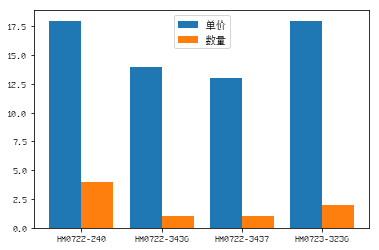

In [72]:
#print(csv.型号.values)
#print(csv.单价.values)

display_num = 4

x = csv.型号.values[0:display_num]
y1 = csv.单价.values[0:display_num]
y2 = csv.数量.values[0:display_num]

ind = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()

ax.bar(ind-width/2, y1, width, label="单价")
ax.bar(ind+width/2, y2, width, label="数量")
ax.set_xticks(ind)
ax.set_xticklabels(x)

#ax.plot(x, y1, label="单价")
#ax.plot(x, y2, label="数量")

ax.legend()

plt.show()

## Read XLSX FIle

In [73]:
# Install module 'xlrd' before read excel file.
#
#   %pip install xlrd
#

In [74]:
xlsx = pd.read_excel('sample.xlsx', 'Sheet2', index_col=[0], na_values=['NA'])
xlsx

,QUANTITY
REASON,
ORDERED_WRONG_ITEM,5
APPAREL_TOO_SMALL,74
APPAREL_STYLE,33
UNWANTED_ITEM,12
MISORDERED,8
APPAREL_TOO_LARGE,33
UNDELIVERABLE_UNKNOWN,2
NOT_AS_DESCRIBED,5
NO_REASON_GIVEN,6


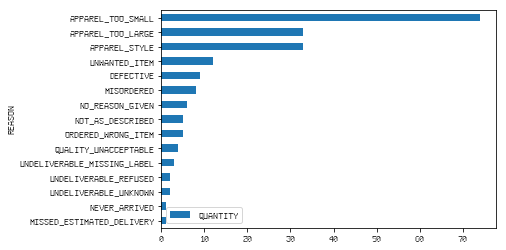

In [75]:
xlsx.sort_values(by='QUANTITY', ascending=True).plot.barh()